In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Source: :http://data.seoul.go.kr/ 
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [748]:
cols  = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_point", "radiation", "rain", "snow", "functional_day"]
data = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
data.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(percent),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [749]:
data.columns = cols
data["functional_day"] = (data["functional_day"] == 'Yes').astype(int)
data.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_point,radiation,rain,snow,functional_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [750]:
data = data[data["hour"] == 12]
data.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_point,radiation,rain,snow,functional_day
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [751]:
data = data.drop("hour", axis=1)
data.head()

,bike_count,temp,humidity,wind,visibility,dew_point,radiation,rain,snow,functional_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [752]:
data.columns

Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_point',
       'radiation', 'rain', 'snow', 'functional_day'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

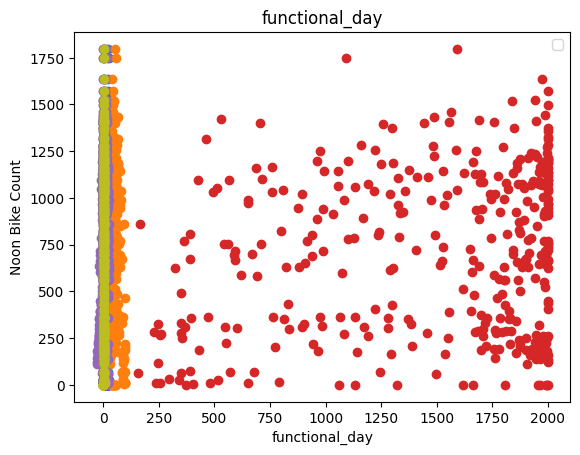

In [753]:
for label in data.columns[1:]:
    plt.scatter(data[label], data["bike_count"])
    plt.title(label)
    plt.ylabel("Noon Bike Count")
    plt.xlabel(label)
    plt.legend()
    #plt.show()


In [754]:
data = data.drop(["wind", "visibility", "functional_day"], axis=1)
data.head()

,bike_count,temp,humidity,dew_point,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [755]:
data.columns

Index(['bike_count', 'temp', 'humidity', 'dew_point', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [756]:
train, val, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [757]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            x = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1,1)
  
    data = np.hstack((x, y))

    return data, x, y

In [758]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, x_valid_temp, y_valid_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [759]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [760]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.49094992]] [384.61261769]


In [761]:
print(temp_reg.score(x_test_temp, y_test_temp))

0.3771256850596676


In [762]:
data.columns

Index(['bike_count', 'temp', 'humidity', 'dew_point', 'radiation', 'rain',
       'snow'],
      dtype='object')

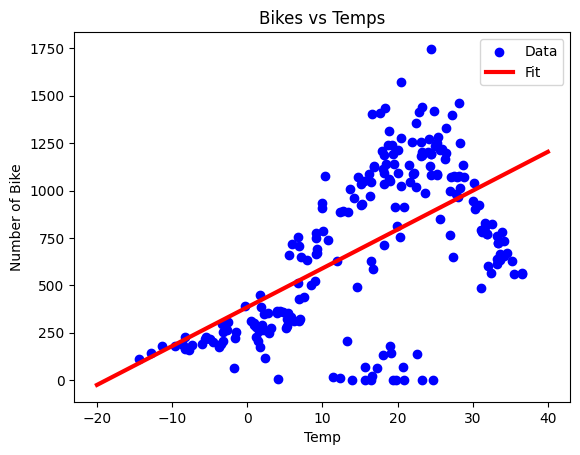

In [763]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes vs Temps")
plt.ylabel("Number of Bike")
plt.xlabel("Temp")
plt.show()

In [764]:
train, val, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=data.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=data.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=data.columns[1:])

In [765]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [766]:
all_reg.score(X_test_all, y_test_all)

0.5066516141517716

In [767]:
y_pred_lr = all_reg.predict(X_test_all)

In [768]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [769]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=1)
temp_normalizer.adapt(x_train_temp.reshape(-1,1))


In [770]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [771]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1), loss='mean_squared_error')

In [772]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    verbose=-0,
    epochs=100,
    validation_data=(x_valid_temp, y_valid_temp)
)

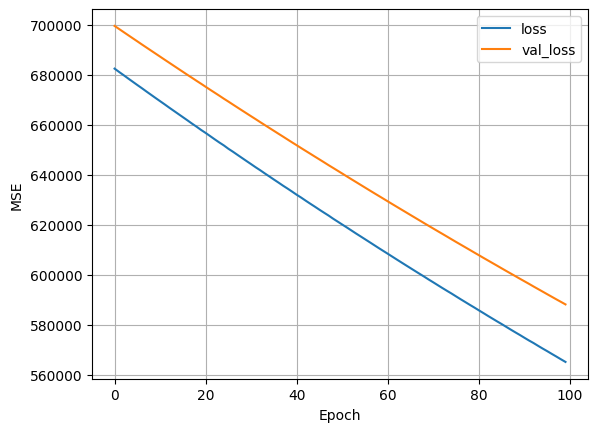

In [773]:
plot_loss(history)

4/4 [==============================] - 0s 736us/step


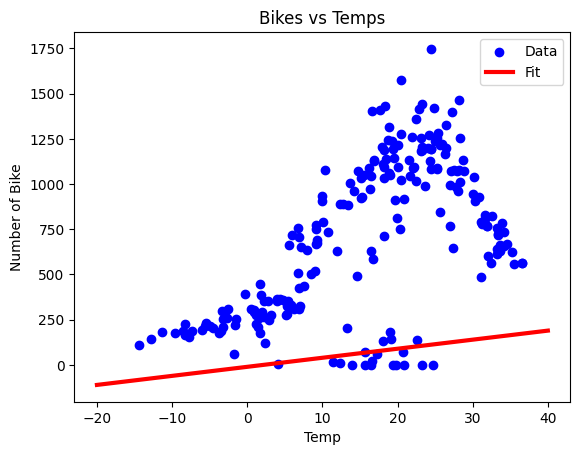

In [774]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes vs Temps")
plt.ylabel("Number of Bike")
plt.xlabel("Temp")
plt.show()

In [775]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=1)
temp_normalizer.adapt(x_train_temp.reshape(-1,1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss='mean_squared_error')

In [776]:
history = nn_model.fit(
    x_train_temp, y_train_temp,
    validation_data=(x_valid_temp, y_valid_temp),
    verbose=0, epochs=100
)

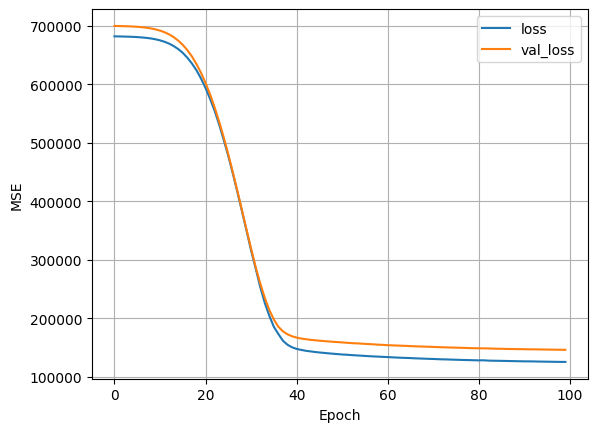

In [777]:
plot_loss(history)

4/4 [==============================] - 0s 667us/step


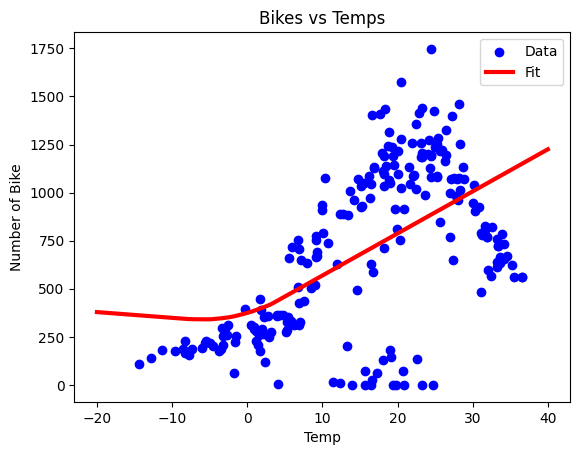

In [778]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes vs Temps")
plt.ylabel("Number of Bike")
plt.xlabel("Temp")
plt.show()

In [779]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss='mean_squared_error')

In [780]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

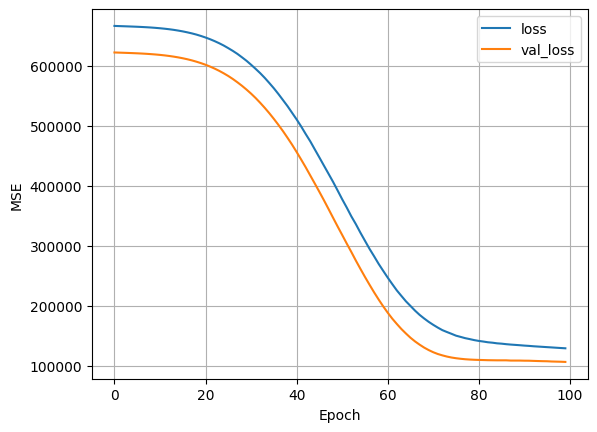

In [781]:
plot_loss(history)

In [782]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 826us/step


In [783]:
def MSE(y_pred, y_real):
    return np.square(y_pred - y_real).mean()

In [784]:
MSE(y_pred_lr, y_test_all)

81974.59152394962

In [785]:
MSE(y_pred_nn, y_test_all)

109104.79302970662

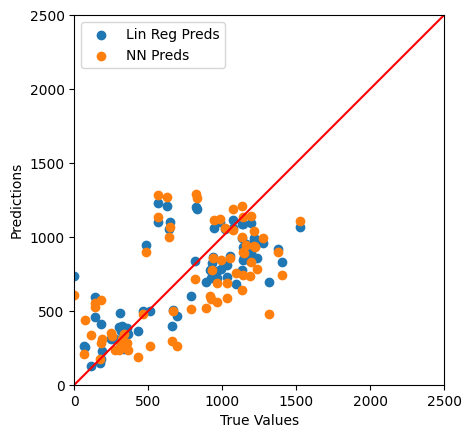

In [786]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label='Lin Reg Preds')
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 2500]
plt.ylim(lims)
plt.xlim(lims)
plt.legend()
_=plt.plot(lims, lims, c='red')
